# Youtube Data

## Importing the data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import json

plt.style.use('ggplot')


In [2]:
CA_videos = pd.read_csv('data/CAvideos.csv')
DE_videos = pd.read_csv('data/DEvideos.csv')
FR_videos = pd.read_csv('data/FRvideos.csv')
GB_videos = pd.read_csv('data/GBvideos.csv')
IN_videos = pd.read_csv('data/INvideos.csv')
JP_videos = pd.read_csv('data/JPvideos.csv')
KR_videos = pd.read_csv('data/KRvideos.csv')
MX_videos = pd.read_csv('data/MXvideos.csv')
RU_videos = pd.read_csv('data/RUvideos.csv')
US_videos = pd.read_csv('data/USvideos.csv')



In [3]:
US_videos['trending_date'] = pd.to_datetime(US_videos['trending_date'], format='%y.%d.%m')
US_videos['trending_date'].head()

US_videos['publish_time'] = pd.to_datetime(US_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
US_videos['publish_time'].head()

US_videos.insert(4, 'publish_date', US_videos['publish_time'].dt.date)
US_videos['publish_time'] = US_videos['publish_time'].dt.time
US_videos[['publish_date', 'publish_time']].head()

,publish_date,publish_time
0,2017-11-13,17:13:01
1,2017-11-13,07:30:00
2,2017-11-12,19:05:24
3,2017-11-13,11:00:04
4,2017-11-12,18:01:41


# Lets import cateogories

In [4]:
id_to_category = {}

with open('data/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

id_to_category



{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

# Making sure ints are ints and str are strs

In [5]:
to_int = ['likes','dislikes','views','comment_count']
for col in to_int:
    US_videos[col] = US_videos[col].astype(int)


to_str = ['category_id']
for col in to_str:
    US_videos[col] = US_videos[col].astype(str)    

# Correlation Matrix

In [6]:
corr_matrix = US_videos[to_int].corr()
corr_matrix

,likes,dislikes,views,comment_count
likes,1.000000,0.447186,0.849177,0.803057
dislikes,0.447186,1.000000,0.472213,0.700184
views,0.849177,0.472213,1.000000,0.617621
comment_count,0.803057,0.700184,0.617621,1.000000


# Remove Duplicates


In [7]:

my_df = US_videos
my_df.drop_duplicates(subset = "title",keep= 'first',inplace=True) 



#adding a new column for categories
my_df.insert(4, 'category', my_df['category_id'].map(id_to_category))
my_df[['category_id', 'category']].head()



,category_id,category
0,22,People & Blogs
1,24,Entertainment
2,23,Comedy
3,24,Entertainment
4,24,Entertainment


In [8]:
#top 10
def most(df, column, num = 10):
    sorted_df = df.sort_values(column, ascending = False).iloc[:num]

    ax = sorted_df[column].plot.bar()



    labs = []
    full_labs = []
    for i in sorted_df['title']:
        labs.append(i[:10] + '...')
        full_labs.append(i)
    ax.set_xticklabels(labs, rotation = 45, fontsize = 10)
    ax.set_title(column)
    

    plt.show()
    return full_labs
   
    



## Likes 

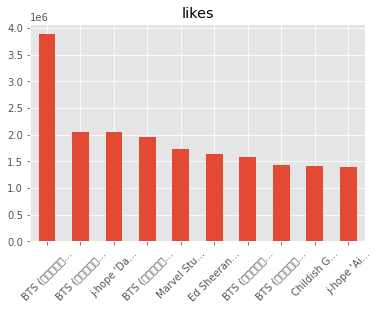

["BTS (방탄소년단) 'FAKE LOVE' Official MV",
 "BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV",
 "j-hope 'Daydream (백일몽)' MV",
 "BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' Comeback Trailer",
 "Marvel Studios' Avengers: Infinity War Official Trailer",
 'Ed Sheeran - Perfect (Official Music Video)',
 "BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF 起 Wonder'",
 "BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ver.)",
 'Childish Gambino - This Is America (Official Video)',
 "j-hope 'Airplane' MV"]

In [9]:
most(my_df,'likes')

## Dislikes

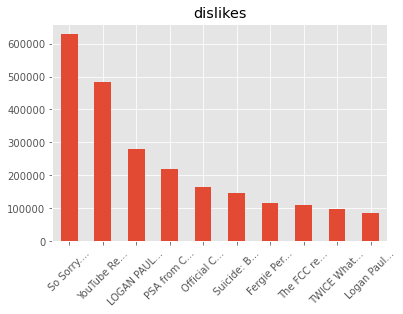

['So Sorry.',
 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind',
 'LOGAN PAUL IS BACK!',
 'PSA from Chairman of the FCC Ajit Pai',
 'Official Call of Duty®: Black Ops 4 —\xa0Multiplayer Reveal Trailer',
 'Suicide: Be Here Tomorrow.',
 'Fergie Performs The U.S. National Anthem / 2018 NBA All-Star Game',
 'The FCC repeals its net neutrality rules',
 'TWICE What is Love? M/V',
 'Logan Paul - SANTA DISS TRACK (Official Music Video)']

In [10]:
most(my_df, 'dislikes')

## Views

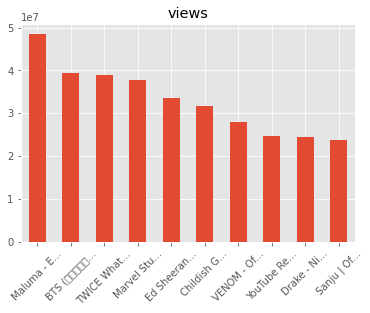

['Maluma - El Préstamo (Official Video)',
 "BTS (방탄소년단) 'FAKE LOVE' Official MV",
 'TWICE What is Love? M/V',
 "Marvel Studios' Avengers: Infinity War Official Trailer",
 'Ed Sheeran - Perfect (Official Music Video)',
 'Childish Gambino - This Is America (Official Video)',
 'VENOM - Official Trailer (HD)',
 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind',
 'Drake - Nice For What',
 'Sanju | Official Trailer | Ranbir Kapoor | Rajkumar Hirani | Releasing on 29th June']

In [11]:
most(my_df,'views')

## Comment count

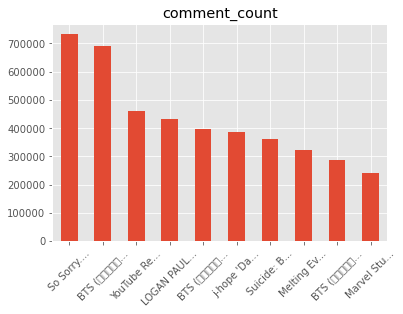

['So Sorry.',
 "BTS (방탄소년단) 'FAKE LOVE' Official MV",
 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind',
 'LOGAN PAUL IS BACK!',
 "BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV",
 "j-hope 'Daydream (백일몽)' MV",
 'Suicide: Be Here Tomorrow.',
 'Melting Every Lipstick From Sephora Together',
 "BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' Comeback Trailer",
 "Marvel Studios' Avengers: Infinity War Official Trailer"]

In [12]:
most(my_df,'comment_count')

# Category bar graph

In [13]:
my_df

,video_id,trending_date,title,channel_title,category,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40760,dS5Thrl-4Kc,2018-06-14,CRAYOLA MAKEUP | HIT OR MISS?,Laura Lee,Howto & Style,2018-06-12,26,18:55:26,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",607422,26166,895,3517,https://i.ytimg.com/vi/dS5Thrl-4Kc/default.jpg,False,False,False,"Hey Larlees, todays video is me testing Crayol..."
40761,JGm9Y_hFqNk,2018-06-14,First Take reacts: Kyrie Irving says contract ...,ESPN,Sports,2018-06-13,17,15:06:08,"espn|""espn live""|""boston celtics""|""kyrie irvin...",812832,7701,320,2505,https://i.ytimg.com/vi/JGm9Y_hFqNk/default.jpg,False,False,False,First Take's Stephen A. Smith and Max Kellerma...
40762,6h8QgZF5Qu4,2018-06-14,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,The Late Late Show with James Corden,Entertainment,2018-06-13,24,05:27:27,"The Late Late Show|""Late Late Show""|""James Cor...",864189,18811,399,1074,https://i.ytimg.com/vi/6h8QgZF5Qu4/default.jpg,False,False,False,James Corden and Ashton Kutcher square off in ...
40764,mpnshdmtE2Y,2018-06-14,Carla Makes BA Smashburgers | From the Test Ki...,Bon Appétit,Howto & Style,2018-06-12,26,16:03:58,"bon appetit|""burgers""|""cheeseburgers""|""how to ...",540149,14206,693,1211,https://i.ytimg.com/vi/mpnshdmtE2Y/default.jpg,False,False,False,"Ground chuck is a great all-purpose, buy-it-an..."


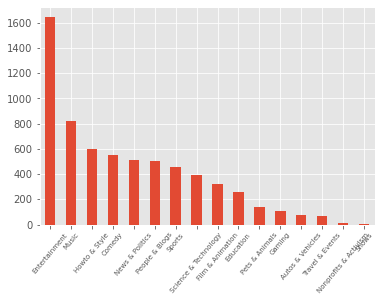

In [14]:
cat_count = my_df['category'].value_counts() # frequency for each category
cat_count

ax = cat_count.plot.bar()
ax.set_xticklabels(labels=cat_count.index, rotation=50, fontsize=7)

plt.show()